In [1]:
import seaborn as sns 
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import requests
import numpy as np 
from sklearn.linear_model import LogisticRegression
from patsy import dmatrices
import statsmodels.api as sm

%matplotlib inline  

sns.set_context("notebook", font_scale=1)
sns.set_style("ticks")

# Read, Explore and Pre-Process Data

In [2]:
def read_csv(filename):
    '''
    --------------------------------------------------------------------
    Imports data from csv 
    --------------------------------------------------------------------
    INPUTS:
    filename  = string of file location and filename 
    
    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION:
        pd.read_csv
    
    OBJECTS CREATED WITHIN FUNCTION:
    df =  dataframe from the csv

    FILES CREATED BY THIS FUNCTION: None
    
    RETURNS: df
    --------------------------------------------------------------------
    '''
    
    df = pd.read_csv(filename)
    
    return df

def plot_hist(df, param):
    '''
    --------------------------------------------------------------------
    Plots a density histogram of a particular parameter of a dataframe
    --------------------------------------------------------------------
    INPUTS:
    df    = dataframe where the parameter is found in 
    
    param = string name of variable to be plotted 
    
    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION:
        sns.distplot
    
    OBJECTS CREATED WITHIN FUNCTION:
    a =  density histogram plot 

    FILES CREATED BY THIS FUNCTION: None
    
    RETURNS: a
    --------------------------------------------------------------------
    '''
    #pre-process NaN obs
    replace_mean(df, param)
    
    plt.figure()
    a = sns.distplot(df[param], kde = False, norm_hist = True)
        
    return a 
    
    
def summary_stats(df):
    '''
    --------------------------------------------------------------------
    Displays summary statistics of all variables in a dataframe 
    --------------------------------------------------------------------
    INPUTS:
    df    = dataframe 

    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION:
        pd.df.describe
    
    OBJECTS CREATED WITHIN FUNCTION:
    sum_stats =  dataframe of summary statistics of all variables

    FILES CREATED BY THIS FUNCTION: None
    
    RETURNS: sum_stats
    --------------------------------------------------------------------
    '''
    
    sum_stats = df.describe()
    
    return sum_stats



def var_exploration(df):
    '''
    --------------------------------------------------------------------
    Generates summary statistics of all variables and plots a density
    histogram for all variables 
    --------------------------------------------------------------------
    INPUTS:
    df    = dataframe 
    
    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION:
        summary_stats
        plot_hist
    
    OBJECTS CREATED WITHIN FUNCTION:
    sum_stats =  dataframe of summary statistics of variables 
                 density histogram plots of all variables 
                 
    FILES CREATED BY THIS FUNCTION: None
    
    RETURNS: sum_stats
    --------------------------------------------------------------------
    '''
    
    sum_stats = summary_stats(df)
    
    for column in df:
        plot_hist(credit, column)
    
    return sum_stats

# Pre-processing Data 
def replace_mean(df, param):
    '''
    --------------------------------------------------------------------
    Replaces missing values with the mean value of other observations
    --------------------------------------------------------------------
    INPUTS:
    df    = dataframe where the variable is found in 
    
    param = string name of variable to be plotted 
    
    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION:
        
    
    OBJECTS CREATED WITHIN FUNCTION:
    

    FILES CREATED BY THIS FUNCTION: None
    
    RETURNS: 
    --------------------------------------------------------------------
    '''
    
    df[param][df[param].isnull()] = df[param].mean()

In [3]:
credit = read_csv("data/credit-data.csv")

Firstly, we begin exploring our dataset by providing summary statistics and histograms of all variables in the dataset. We also conduct a simple pre-processing of the data, by filling in missing values by the mean of the rest of the values. From the histograms plotted, `SeriousDIqin2yrs` is a dummy (categorical) variable that takes on a value of 1 and 0, where 1 represents a a person who has committed 90 days past due delinquency or worse and 0 otherwise. After pre-processing, only `age` and `NumberOfOpenCreditLinesAndLoans` are well-visualized in the histogram plots without outliers.

C:\Users\Lim Cheng Yee\Anaconda3\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)
C:\Users\Lim Cheng Yee\Anaconda3\lib\site-packages\ipykernel\__main__.py:134: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,PersonID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,zipcode,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,75000.500000,0.066840,6.048438,52.295207,60648.810013,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,56.748197,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,1.000000,0.000000,0.000000,0.000000,60601.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,60625.000000,0.000000,0.175074,NaN,5.000000,0.000000,0.000000,0.000000,NaN
50%,75000.500000,0.000000,0.154181,52.000000,60629.000000,0.000000,0.366508,NaN,8.000000,0.000000,1.000000,0.000000,NaN
75%,112500.250000,0.000000,0.559046,63.000000,60644.000000,0.000000,0.868254,NaN,11.000000,0.000000,2.000000,0.000000,NaN
max,150000.000000,1.000000,50708.000000,109.000000,60804.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


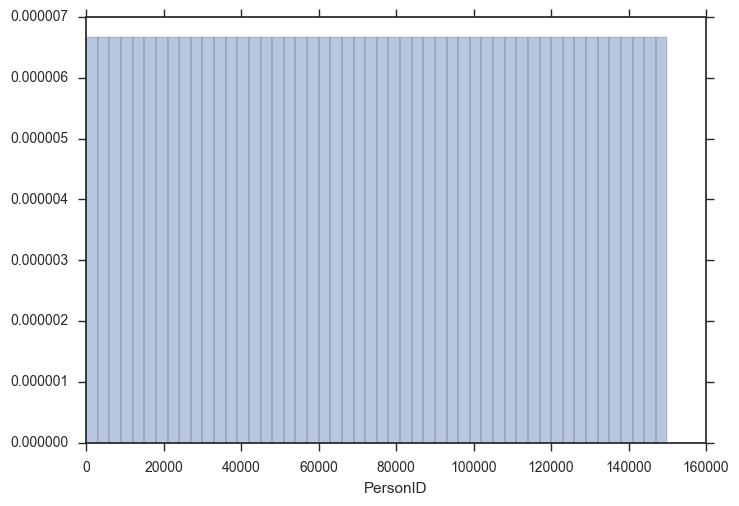

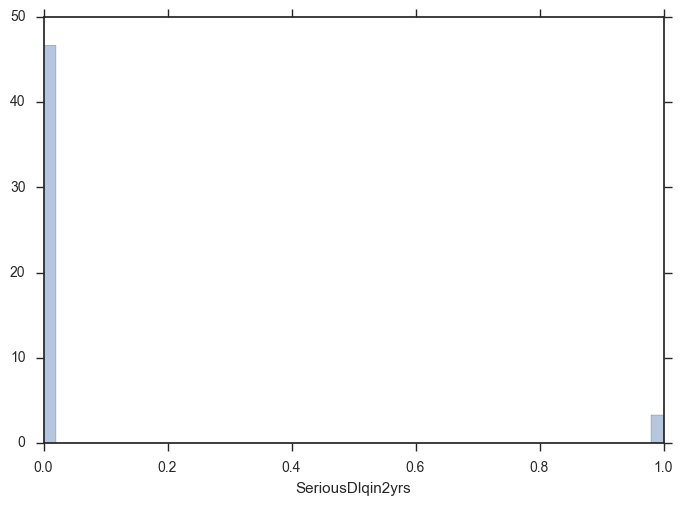

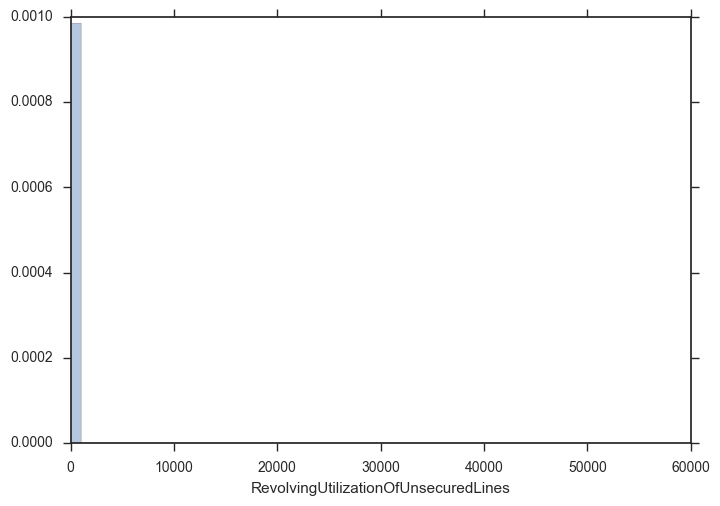

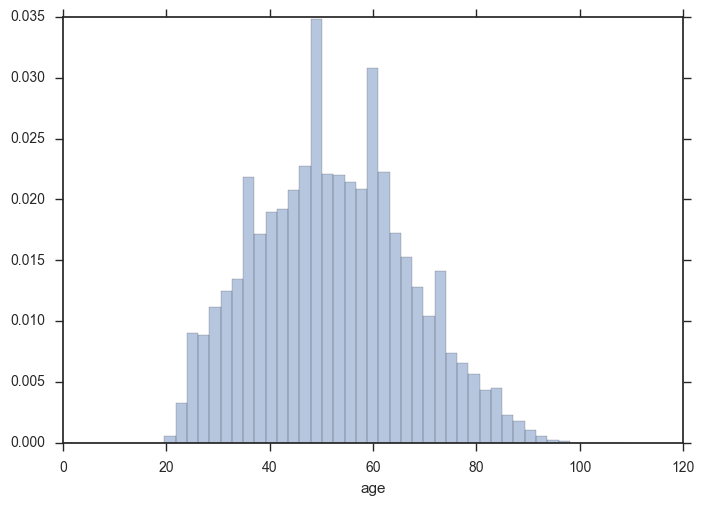

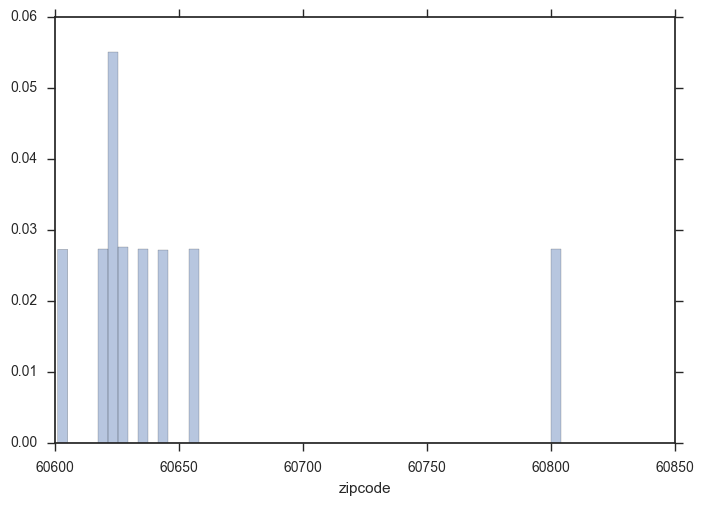

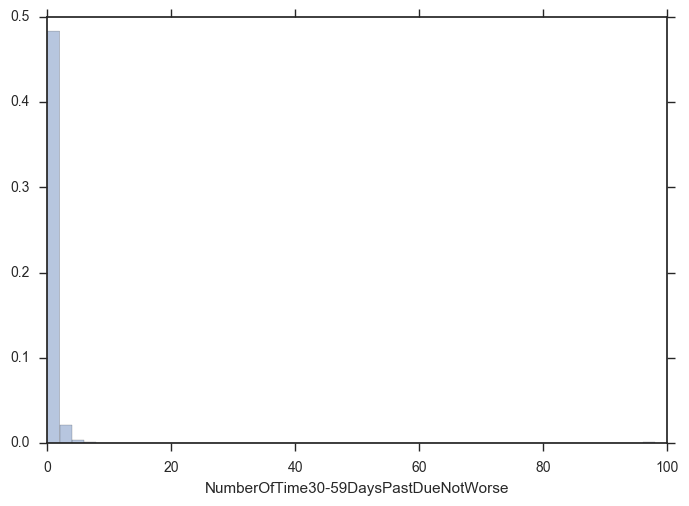

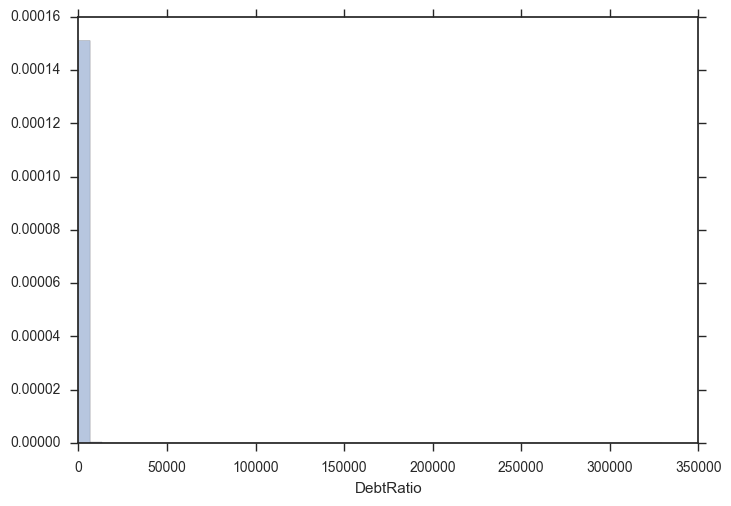

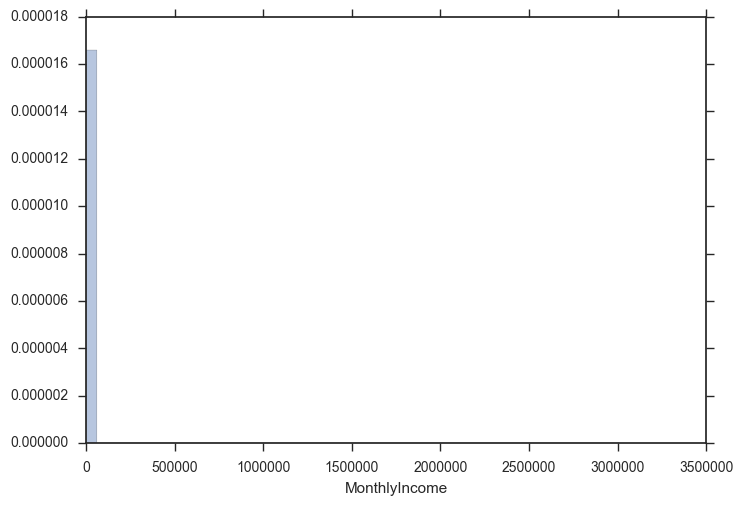

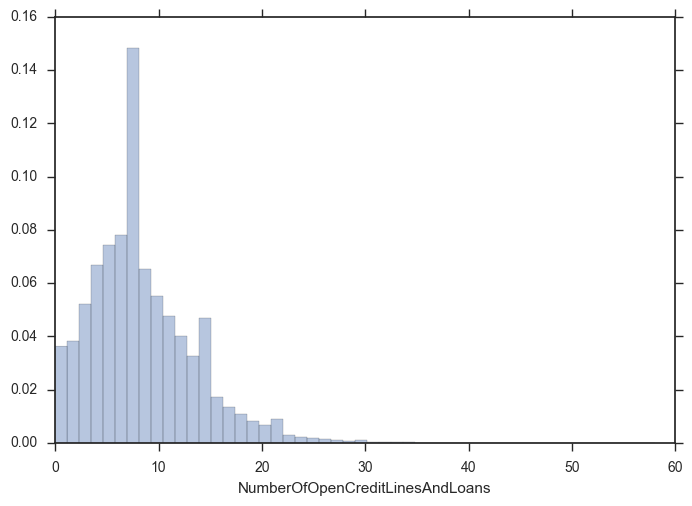

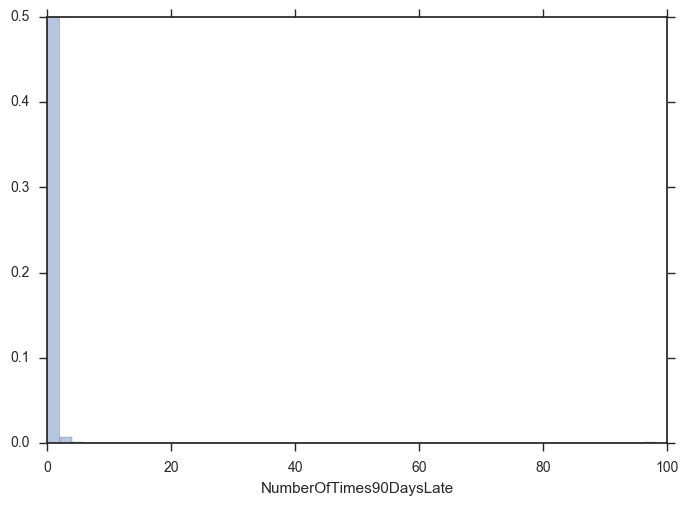

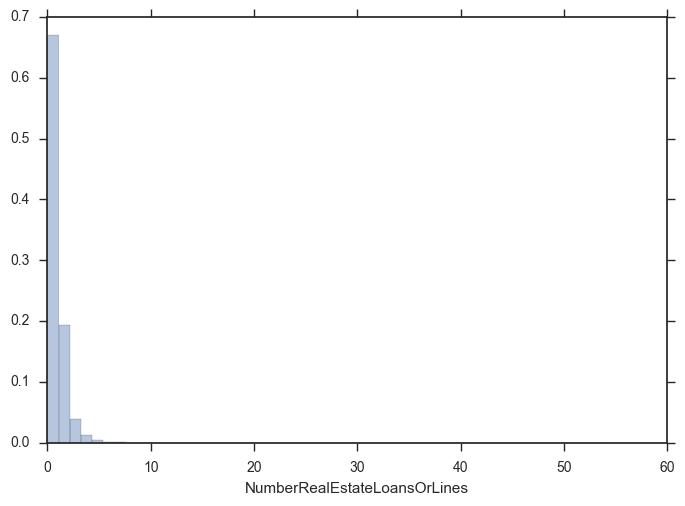

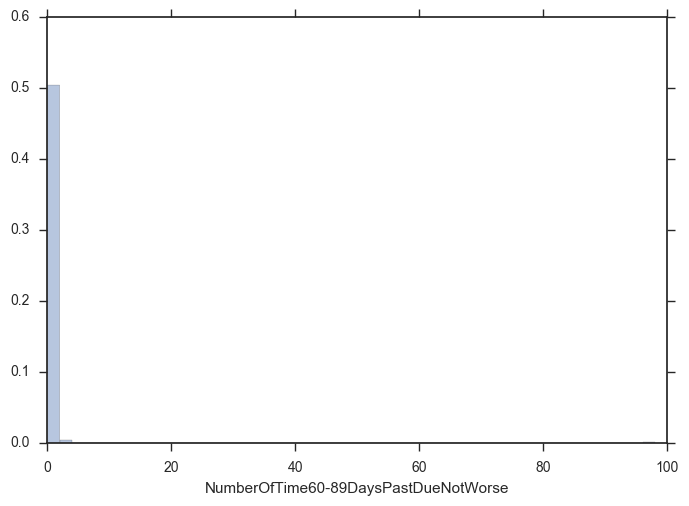

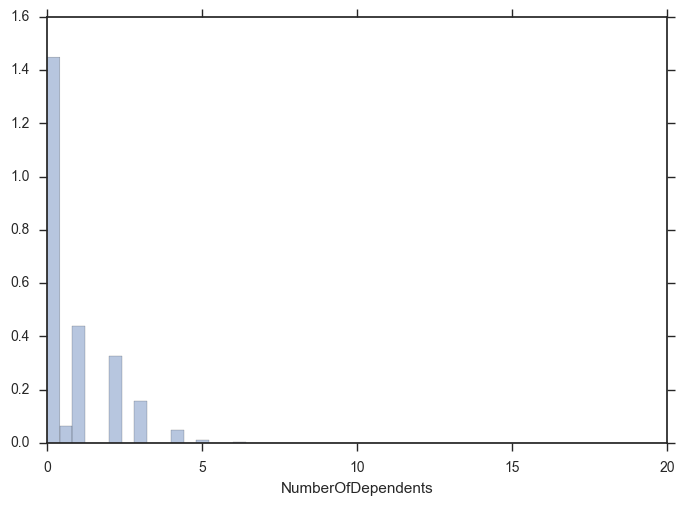

In [4]:
var_exploration(credit)

From the summary statistics, we know that the variables `NumberOfDependents` and `MonthlyIncome` have missing values. Thus, we replace these missing values with the mean of these variables. Now all variables have 150,000 observations.

In [5]:
replace_mean(credit, 'NumberOfDependents')
replace_mean(credit, 'MonthlyIncome')
summary_stats(credit)

C:\Users\Lim Cheng Yee\Anaconda3\lib\site-packages\ipykernel\__main__.py:134: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


,PersonID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,zipcode,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.500000e+05,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000
mean,75000.500000,0.066840,6.048438,52.295207,60648.810013,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,43301.414527,0.249746,249.755371,14.771866,56.748197,4.192781,2037.818523,1.288045e+04,5.145951,4.169304,1.129771,4.155179,1.100404
min,1.000000,0.000000,0.000000,0.000000,60601.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37500.750000,0.000000,0.029867,41.000000,60625.000000,0.000000,0.175074,3.903000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,75000.500000,0.000000,0.154181,52.000000,60629.000000,0.000000,0.366508,6.600000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,112500.250000,0.000000,0.559046,63.000000,60644.000000,0.000000,0.868254,7.400000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,150000.000000,1.000000,50708.000000,109.000000,60804.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


We then proceed to visualizing the histograms without outliers to get a better sense of the individual variables. 

C:\Users\Lim Cheng Yee\Anaconda3\lib\site-packages\ipykernel\__main__.py:134: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Lim Cheng Yee\Anaconda3\lib\site-packages\pandas\core\generic.py:4485: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\Lim Cheng Yee\Anaconda3\lib\site-packages\ipykernel\__main__.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


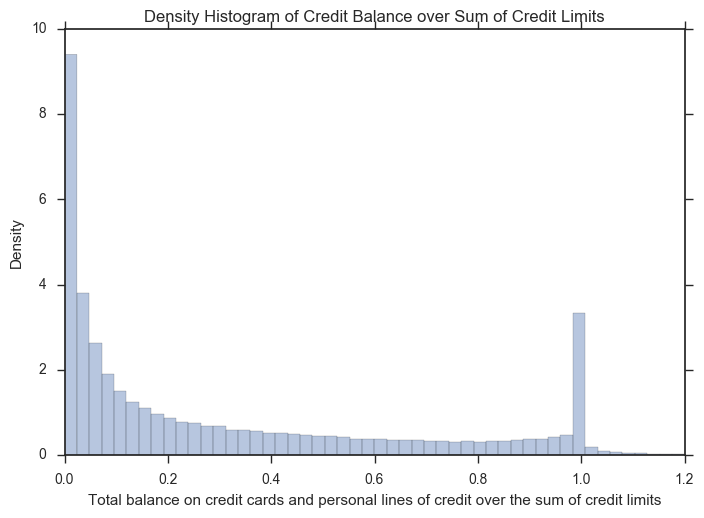

In [6]:
income_hist = credit[credit['RevolvingUtilizationOfUnsecuredLines'] < 1.2] #percentage
plot_hist(income_hist, 'RevolvingUtilizationOfUnsecuredLines')
plt.xlabel("Total balance on credit cards and personal lines of credit over the sum of credit limits")
plt.ylabel("Density")
plt.title("Density Histogram of Credit Balance over Sum of Credit Limits")

C:\Users\Lim Cheng Yee\Anaconda3\lib\site-packages\ipykernel\__main__.py:134: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Lim Cheng Yee\Anaconda3\lib\site-packages\pandas\core\generic.py:4485: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\Lim Cheng Yee\Anaconda3\lib\site-packages\ipykernel\__main__.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


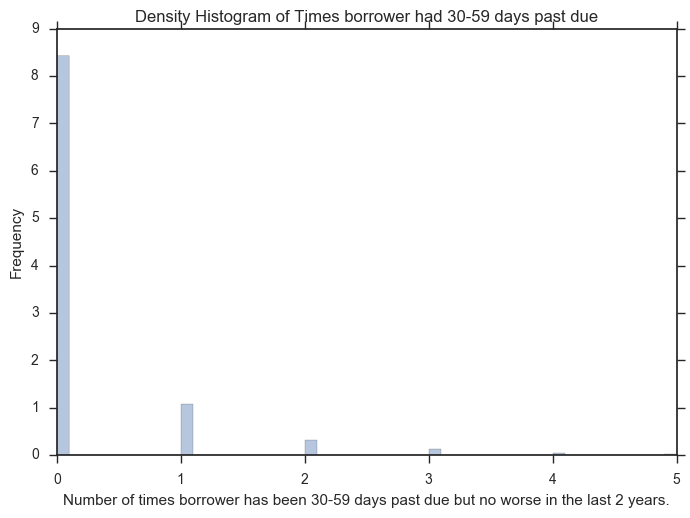

In [7]:
T3059_hist = credit[credit['NumberOfTime30-59DaysPastDueNotWorse'] < 6]
plot_hist(T3059_hist, 'NumberOfTime30-59DaysPastDueNotWorse')
plt.xlabel("Number of times borrower has been 30-59 days past due but no worse in the last 2 years.")
plt.ylabel("Frequency")
plt.title("Density Histogram of Times borrower had 30-59 days past due")

C:\Users\Lim Cheng Yee\Anaconda3\lib\site-packages\ipykernel\__main__.py:134: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
C:\Users\Lim Cheng Yee\Anaconda3\lib\site-packages\pandas\core\generic.py:4485: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)
C:\Users\Lim Cheng Yee\Anaconda3\lib\site-packages\ipykernel\__main__.py:47: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


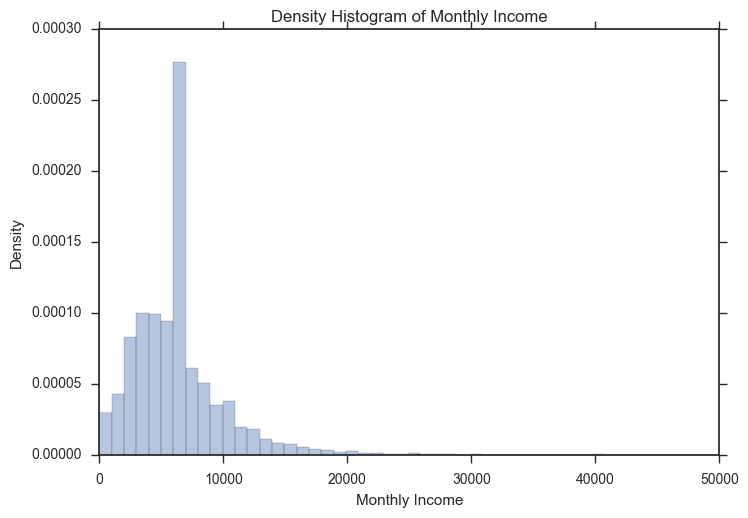

In [8]:
income_hist = credit[credit['MonthlyIncome'] < 50000]
plot_hist(income_hist, 'MonthlyIncome')
plt.xlabel("Monthly Income")
plt.ylabel("Density")
plt.title("Density Histogram of Monthly Income")

# Generate Features

We wrote two functions: 
1. To convert continuous variables to categorical variables 
2. To convert categorical variables to dummy variables

In [9]:
def cont2cat(vals, bins, groupnames):
    '''
    --------------------------------------------------------------------
    Converts a continuous variable into a categorical variable 
    --------------------------------------------------------------------
    INPUTS:
    vals       = a vector of values (continuous variable)
    bins       = list of cut-off values i.e. [0, 50, 100]
    groupnames = list of labels for each category i.e. ['High', 'Low'] 
       
    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION:
        pd.cut
    
    OBJECTS CREATED WITHIN FUNCTION:
    catvals =  a vector of values (categories)

    FILES CREATED BY THIS FUNCTION: None
    
    RETURNS: catvals
    --------------------------------------------------------------------
    '''
    
    catvals = pd.cut(vals, bins, labels = groupnames)
    
    return catvals

def cat2dummy(vals):
    '''
    --------------------------------------------------------------------
    Converts a categorical variable into a separate dummy variables 
    --------------------------------------------------------------------
    INPUTS:
    vals       = a vector of values (categorical variable)

    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION:
        pd.get_dummies
        
    OBJECTS CREATED WITHIN FUNCTION:
    dummies =  a dataframe of dummy variables (Each category becomes a 
                                               dummy)

    FILES CREATED BY THIS FUNCTION: None
    
    RETURNS: dummies
    --------------------------------------------------------------------
    '''    
    dummies = pd.get_dummies(vals)
    
    return dummies


In [10]:
credit.columns = ['ID', 'DI', 'unsecuredlines', 'age', 'zipcode', 'duespastOneMonth', 
                  'debtratio', 'monthlyincome', 'opencredit', 'duespastThreeMonth', 
                  'realestate', 'duespastTwoMonth', 'dependents'] #rename cols

We, then, converted the Number of Dependents to a categorical variable to indicate family size, where Small represents a small family size with 0-4 dependents, Medium represents a medium family size with 5-8 dependents and Large represents a large family size with more than 8 dependents. Then we created dummy variables with the new variable, `familysize`. 

In [11]:
#converting continuous variable to categorical variable 
bins = [-1, 4, 8, 12]
labels = ['Small', 'Medium', 'Large']
credit['familysize'] = cont2cat(credit['dependents'], bins, labels)
#converting categorical variable to dummy variable 
a = cat2dummy(credit['familysize']) 
credit = credit.join(a)

# Building and Evaluating a Classifier

In this pipeline, we built and evaluated simplistically a Logistic Regression classifier.

In [15]:
def log_reg_metric(dmatrix, features):
    '''
    --------------------------------------------------------------------
    Performs a logistic regression and evaluates the classification done 
    --------------------------------------------------------------------
    INPUTS:
    dmatrix  = dmatrices
    features = list of column names (X vars) to be included in the regression 
    
    OTHER FUNCTIONS AND FILES CALLED BY THIS FUNCTION:
        LogisticRegression
        model.fit
        model.score
        np.darray.tolist
        pd.Dataframe
    
    OBJECTS CREATED WITHIN FUNCTION:
    model =  estimated logistic regression model
    accuracy = accuracy rate of predicting correctly
    naive = naive model by predicting all 0
    coef = list of estimated coefficients 
    features = list of variables
    disp_coef = dataframe of variables and its coefficients

    FILES CREATED BY THIS FUNCTION: None
    
    RETURNS: disp_coef
    --------------------------------------------------------------------
    '''
    y, X = dmatrix
    model = LogisticRegression()
    model = model.fit(X, y)
    accuracy = model.score(X, y)
    naive = y.mean()
    print("Logistic Regression Accuracy: ", accuracy)
    print("Naive Model Accuracy: ", 1-naive)
    
    features.insert(0, "Constant")
    coef = np.ndarray.tolist(model.coef_)[0]
    disp_coef = pd.DataFrame({'Parameters': features, 
                              'Coefficients': coef}, 
                            columns = ['Parameters', 'Coefficients'])
    return disp_coef

In [16]:
cols = [col for col in credit.columns if col not in ['ID', 'DI', 'zipcode', 'dependents', 'familysize']]
cols
back = ' + '.join(cols)
front = 'DI  ~ '
front += back #create dmatrix

In [17]:
log_reg_metric(dmatrices(front, credit, return_type = "dataframe"), cols)

C:\Users\Lim Cheng Yee\Anaconda3\lib\site-packages\sklearn\utils\validation.py:526: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Logistic Regression Accuracy:  0.93392
Naive Model Accuracy:  DI    0.93316
dtype: float64


,Parameters,Coefficients
0,Constant,-0.393313
1,unsecuredlines,-0.000037
2,age,-0.029852
3,duespastOneMonth,0.508213
4,debtratio,-0.000027
5,monthlyincome,-0.000033
6,opencredit,-0.007385
7,duespastThreeMonth,0.471987
8,realestate,0.073339
9,duespastTwoMonth,-0.948595


The logistic regression has predicts if an individual experience 90 days past due deliquency at 93.392%. However, a naive model of simply assuming an individual will not experience 90 days past deliquency is 93.316%. Thus, the estimated logistic regression model only improves the accuracy rate slightly. Thus, the logistic regression we estimated is a bad model, and can be further improved on with other machine learning techniques, which we will learn in the next classes.